### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# import warnings
# warnings.filterwarnings('ignore')

sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Distribution of target value

In [6]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
text = df['review'][0]
print(text)
print(word_tokenize(text))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [8]:
corpus = []
for text in df['review']:
  words = [word.lower() for word in word_tokenize(text)]
  corpus.append(words)

In [9]:
number_of_words = len(corpus)
print(number_of_words)

50000


### Split Data for train/test

In [23]:
# X_train = df.review[:42500]
# y_train = df.sentiment[:42500]

# X_test = df.review[42500:]
# y_test = df.sentiment[42500:]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X= df['review'].values
y = df['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = encoded_labels, test_size= 0.20, random_state= 42)

### Tokenizing the words and padding for equal input dimensions

In [24]:
tokenizer=Tokenizer(number_of_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=200, truncating='post', padding='post')

In [25]:
X_train[0], len(X_train[0])

(array([   10,  1054,    11,   119,  1505,   457,    31,  1608,   142,
            8,  4300,    38, 38440,    10,    13,    30,     3,  8743,
         1671,     5,    63,   105,   158,   671,   868,   867,    97,
            1,  1671,    13,  2836,   360,     2,    16,    54,  1778,
           33,  1241,     3,   749,     4,   868,   867,   334,  7861,
            5,    76,   175,     8,     1,  1238,    88,    69,   665,
         1143,    18,    11,   381,    20,     2,   744,  1628,     1,
          308,    13,     8, 17080,     1,  1116,   423,   381,    50,
           33,  1241,  2837,   266,   641, 29625, 26151,   297,     4,
         1128,    20,    40,   407,    59,   284,    30,     1,   348,
          412,     3,  3299,  1897,     2, 10678,    12,    90,     9,
           56,  2706,    22,  3240,    63,   254,    31,    48,   284,
           37,     3,  4544,     9,    13,   578,   671,     2,   365,
           18,    10,   419,   546,  1027,    88,     4,     1,   409,
      

In [26]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=200, truncating='post', padding='post')

In [27]:
X_test[0], len(X_test[0])

(array([  431,  4330,    46,    61,     6,     3,    95,     5,  2460,
        11594,    48,   650,    14,     3,  1040,  1704,  5076,   934,
           20,   273,    12,  1753,     2,    94,     1,   539,   229,
          126,    43,    65, 22771,  1704,   114,  2890,   146, 10982,
           82,     3,    87,    22,   140,   786,    16,   125,   705,
        17578,    10,   325,     5,   103, 11594,    29,     1,    55,
            2,   426,     9,   146,  1233,   133,   100,   147,     1,
           34,   437,    17,    10,    67,    62,   580,    48,     1,
          220,     4,    11,    29,    13, 11594,   718,   175,    87,
            5,   473,    41,   114,     8,  1147,  1391,    68,   152,
            1,   220, 11594,    90,   170,   395,    12,    48,    22,
           37,     5,    77,     6,   600,    14,   195,    14,     9,
            6,   600,    16,   642,    54,   495,    48,     1,   369,
            4,     1,  1164,   638,   182,  1277,     4,     9,    11,
      

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 200) (40000,)
(10000, 200) (10000,)


In [29]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Create a Base Model

In [30]:
model = Sequential()

model.add(Embedding(input_dim=number_of_words, output_dim=100,
                    input_length=200, trainable=True)) # change

model.add(LSTM(100, dropout=0.3, return_sequences=True))  #0.3
model.add(LSTM(100, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          5000000   
                                                                 
 lstm_2 (LSTM)               (None, 200, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test), verbose=1, validation_split= 0.2)

Epoch 1/10
8000/8000 [==============================] - 197s 24ms/step - loss: 0.6953 - accuracy: 0.4980 - val_loss: 0.6958 - val_accuracy: 0.4989
Epoch 2/10
8000/8000 [==============================] - 192s 24ms/step - loss: 0.6846 - accuracy: 0.5460 - val_loss: 0.7053 - val_accuracy: 0.5251
Epoch 3/10
8000/8000 [==============================] - 192s 24ms/step - loss: 0.5099 - accuracy: 0.7492 - val_loss: 0.4045 - val_accuracy: 0.8220
Epoch 4/10
8000/8000 [==============================] - 191s 24ms/step - loss: 0.3021 - accuracy: 0.8769 - val_loss: 0.3083 - val_accuracy: 0.8726
Epoch 5/10
8000/8000 [==============================] - 191s 24ms/step - loss: 0.1905 - accuracy: 0.9287 - val_loss: 0.3168 - val_accuracy: 0.8666
Epoch 6/10
8000/8000 [==============================] - 191s 24ms/step - loss: 0.1225 - accuracy: 0.9579 - val_loss: 0.3748 - val_accuracy: 0.8744
Epoch 7/10
8000/8000 [==============================] - 191s 24ms/step - loss: 0.0746 - accuracy: 0.9768 - val_loss: 0

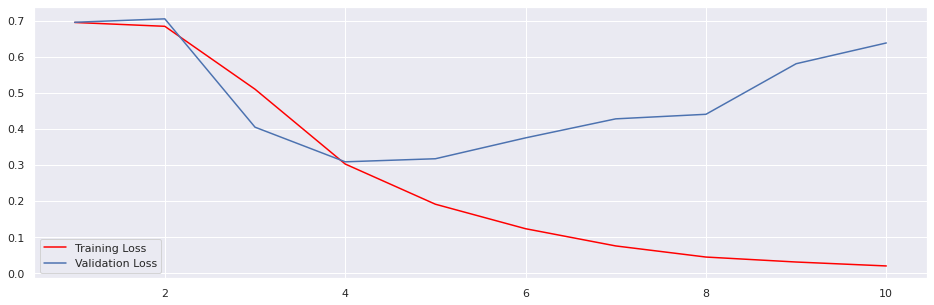

In [33]:
plt.figure(figsize=(16,5))
epochs= range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[3300 1700]
 [3116 1884]]


0.5184

In [36]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('CNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3300 1700]
 [3116 1884]]
precision:0.526 
recall:0.377
F1 score: 0.439
AUC: 0.5184
Accuracy: 51.84%


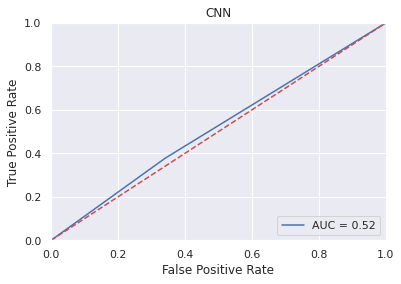

In [37]:
evaluate(y_test, y_pred)